# 손글씨 숫자 분류 학습

케라스 파이썬 라이브러리를 사용하여 손글씨 숫자 분류 학습
- 흑백 손글씨 숫자 이미지(28x28 픽셀)를 10개의 범주(0에서 9까지)로 분류
- MNIST 데이터셋 사용
- 1980년대에 미국 국립표준기술연구소에서 수집한 
- 6만 개의 훈련 이미지와 1만 개의 테스트 이미지로 구성
- MNIST 데이터셋은 넘파이 배열 형태로 케라스에 이미 포함되어 있음

## 손글씨 숫자 분류 작업
- (1) 데이터 준비     
- (2) 이미지 데이터 전처리  
  - 2차원 이미지를 1차원 벡터로 변환    
  - 정규화   
  - 원-핫 인코딩       
- (3) 모델링  


### (1) 데이터 준비 

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# 데이터 로드
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [8]:
# 데이터 세트 확인
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(60000, 28, 28)

(60000,)

(10000, 28, 28)

(10000,)

In [ ]:
# (60000, 28, 28) : 3D 텐서
# -> 2D텐서 : (60000, 28*28) == (60000, 784) (샘플수, 피처수)
# -> 1차원 : (784, ) (데이터 개수)
# input_shape=(28*28, ) == input_shape=(784, )

In [11]:
X_train # 3차 (2D들이 여러개씩)
X_train[0] # 28*28

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [13]:
# 레이블 값 확인
y_train[:10]
y_train[4] # 5번째 값 : 9

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

9

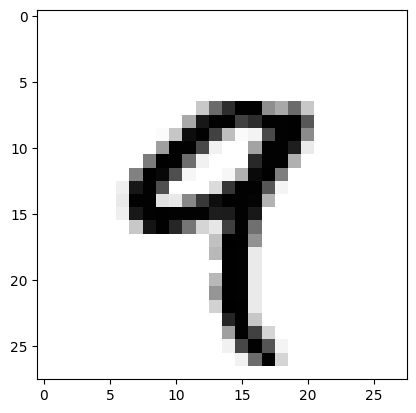

In [21]:
# 다섯 번째 샘플(9)을 시각화해서 확인
digit = X_train[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [17]:
# X_train[9]
# 화면을 작게하면 4모양이 보임
# 28*28 픽셀
# 0~255 : 숫자가 클수록 진하게 표시 

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

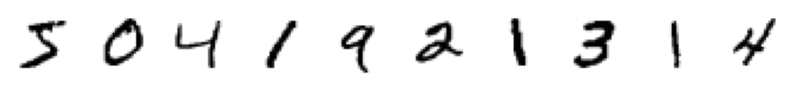

In [24]:
# 처음 10개 손글씨 이미지 확인
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(X_train[i], cmap=plt.cm.binary)
    axs[i].axis('off')   # 테두리없애기
    
plt.show()

### (2) 이미지 데이터 전처리
- 3차원 이미지를 2차원으로 변환
  - (60000, 28, 28)  -> (60000, 784) (샘플수, 피처수)  
  - 이유 : Dense 층의 입력값으로 사용 시 
    - 2차원 형태의 데이터 사용하지 못하고  
    - 1차원 형태로 변환해야 함
    - 가로,세로 (28, 28) - > (784, ) 또는 (28*28, )
    - input_shape(784,)  
- 정규화  
  - 이미지의 실제 픽셀 값 : 0~255 범위의 값  
  - 정규화 해서 0~1사이의 값으로 변환  
- 원-핫 인코딩
  - 0~9 숫자 레이블이 범주형이므로 원-핫 인코딩 수행  

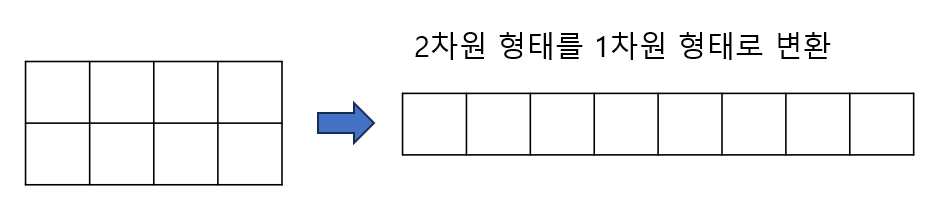

####  reshape / 정규화 (Normalization)

In [26]:
# 이미지의 실제 픽셀 값 확인 : 0~255 범위의 값
np.min(X_train), np.max(X_train)

(0, 255)

In [ ]:
x = X_train

In [28]:
# 변환 전 데이터
X_train.shape
X_test.shape

(60000, 28, 28)

(10000, 28, 28)

In [31]:
# 차원 변환 및 정규화
# X_train : (60000, 28, 28) -> (60000, 28*28) == (60000, 784) 
X_train2 = X_train.reshape(60000, 28*28)
X_train2 = X_train2 / 255

# X_test : (10000, 28, 28) -> (10000, 784)
X_test2 = X_test.reshape(10000, 28*28)
X_test2 = X_test2 / 255

In [32]:
# 변환 후 데이터
X_train2.shape
X_test2.shape

(60000, 784)

(10000, 784)

#### 원-핫 인코딩 

In [33]:
# 원-핫 인코딩 수행 전
y_train[:10] # 숫자형 카테고리 값

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [35]:
# 0~9 값의 레이블을 원-핫 인코딩 변환 (binary화) : 0 또는 1로 변환
from keras.utils import to_categorical

y_train2 = to_categorical(y_train)
y_test2 = to_categorical(y_test)

In [41]:
# 원-핫 인코딩 수행 후
y_test2[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### (3) 모델링 

#### 모델링 순서  
(1) 모델 설정   
(2) 모델 컴파일   
(3) 모델 학습(실행)   
(4) 모델 평가(결과 출력)  
- 사용 데이터
    - 위에서 전처리 작업 끝낸 데이터 사용
    - X_train2, y_train2, X_test2, y_test2

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

tf.random.set_seed(3)

# (1) 모델 설정
# 2개의 층으로 구성된 모델 
# 첫 번째 층  :입력 : 28*28=784, 출력 : 512
# 두 번째 층 : 입력 512, 출력 : 10
model = Sequential()
model.add(Dense(units=512, input_shape=(784,), activation='softmax'))
model.add(Dense(units=10, activation='softmax'))

# 활성화 함수 : activation = 'softmax' : 다중 분류 
# 출력층 출력값 수 : 10

# (2) 컴파일
# 다중분류 : loss='categorical_crossentropy'
# 최적화 : optimizer='rmsprop'
# 평가방법 : metrics='accuracy'
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


# (3) 모델 학습 (실행)
epochs=100
batch_size=128
# model.fit(x=X_train2, y=y_train2, epochs=epochs, batch_size=batch_size )

# 학습 과정 결과를 history 객체에 저장
history = model.fit(x=X_train2, y=y_train2,
                    epochs=epochs, batch_size=batch_size,
                   validation_data=(X_test2, y_test2 ))  # validation_data 지정해야 함
# (4) 모델 평가 (결과 출력)
loss, accuracy =  model.evaluate(X_test2, y_test2)
print(f'정확도 : {accuracy:.4f}, 손실 : {loss:.4f}')

Epoch 1/100
469/469 [==============================] - 3s 6ms/step - loss: 1.9015 - accuracy: 0.7283 - val_loss: 1.5772 - val_accuracy: 0.7893
Epoch 2/100
469/469 [==============================] - 2s 5ms/step - loss: 1.3252 - accuracy: 0.8135 - val_loss: 1.0896 - val_accuracy: 0.8399
Epoch 3/100
469/469 [==============================] - 2s 5ms/step - loss: 0.9056 - accuracy: 0.8754 - val_loss: 0.7351 - val_accuracy: 0.9046
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.6063 - accuracy: 0.9164 - val_loss: 0.4933 - val_accuracy: 0.9229
Epoch 5/100
469/469 [==============================] - 3s 7ms/step - loss: 0.4212 - accuracy: 0.9276 - val_loss: 0.3618 - val_accuracy: 0.9294
Epoch 6/100
469/469 [==============================] - 2s 5ms/step - loss: 0.3245 - accuracy: 0.9330 - val_loss: 0.2963 - val_accuracy: 0.9344
Epoch 7/100
469/469 [==============================] - 2s 5ms/step - loss: 0.2767 - accuracy: 0.9374 - val_loss: 0.2654 - val_accuracy: 0.9366

Epoch 58/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1458 - accuracy: 0.9624 - val_loss: 0.2291 - val_accuracy: 0.9450
Epoch 59/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1448 - accuracy: 0.9625 - val_loss: 0.2286 - val_accuracy: 0.9461
Epoch 60/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1447 - accuracy: 0.9628 - val_loss: 0.2292 - val_accuracy: 0.9451
Epoch 61/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1441 - accuracy: 0.9623 - val_loss: 0.2309 - val_accuracy: 0.9436
Epoch 62/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1440 - accuracy: 0.9628 - val_loss: 0.2275 - val_accuracy: 0.9445
Epoch 63/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1433 - accuracy: 0.9631 - val_loss: 0.2293 - val_accuracy: 0.9438
Epoch 64/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1428 - accuracy: 0.9633 - val_loss: 0.2298 - val_accuracy:

### 시각화

<Figure size 1800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'accuracy')

<Axes: >

Text(0.5, 1.0, 'loss')

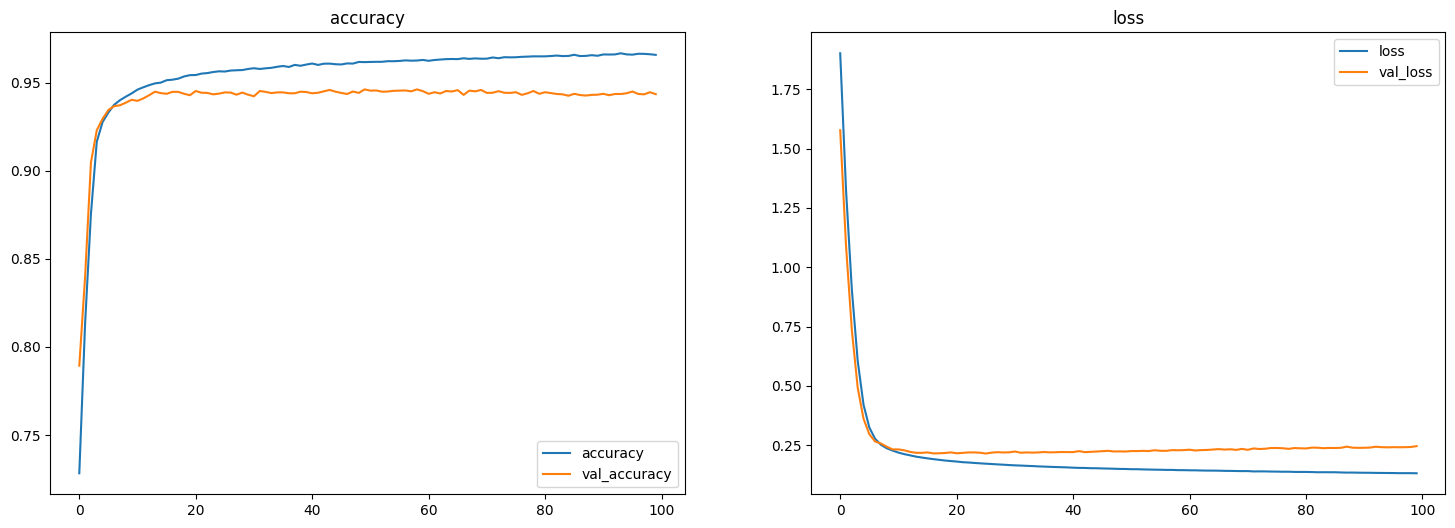

In [55]:
# accuracy와 loss 확인
# accuracy / val_accuracy
# loss / val_loss

# 필요한 값
# history 객체의 history['accuracy'] 
# history 객체의 history['val_accuracy']
# history 객체의 history['loss']
# history 객체의 history['val_loss']

plt.figure(figsize=(18, 6))

# 정확도
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('accuracy')
plt.legend()

# 손실률
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('loss')
plt.legend()

plt.show()

### 모델 저장 

In [56]:
model.save('../../data/img_model.h5') # legacy

/Users/jeong_ahn/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [57]:
model.save('../../data/img_model.keras')

### 모델 불러오기 

In [58]:
from tensorflow.keras.models import load_model

loaded_model = load_model('../../data/img_model.h5')

In [60]:
loaded_model = load_model('../../data/img_model.keras')

## loaded_model 모델로 예측 

In [62]:
# predict() 사용해서 예측
# 예측확률 반환
# 예 : [0.111111, 0.777777, 0.3333333,........]

In [67]:
y_pre_prob = loaded_model.predict(X_test2, verbose=0)
y_pred = y_pre_prob.argmax(axis=1)
y_pred[:10]
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [68]:
y_train[9]

4

In [129]:
X_train[9] 
# 화면 축소해서 보면 4 처럼 보임

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0, 189, 190,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0, 143, 247, 153,   0,   0,
          0,   0],
       [  

In [ ]:
# 연습문제
# X_train2[9] 값으로 예측
# X_train2[9] 값을 적절한 형태로 변환하여
# predict() 함수에 넣어서 4로 예측하는지 확인
# 다섯 번째 샘플(9)을 시각화해서 확인

In [126]:
# 차원 변환 및 정규화 (샘플수, 피처수)
# X_train2[9] : (784,) -> == (1,784) 샘플 1개
test = X_train2[9].reshape(1,28*28)/255

# 정규화
# 이미지의 실제 픽셀 값 : 0~255 범위의 값
# 정규화 해서 0~1사이의 값으로 변환해야하므로 255로 나눈다.

In [127]:
X_train2[9].shape
test.shape  
# reshape 성공

(784,)

(1, 784)

In [122]:
# predict
y_pre_prob = loaded_model.predict(test, verbose=0)
y_pred = y_pre_prob.argmax(axis=1)
y_pred
# 4로 예측 성공

array([4])

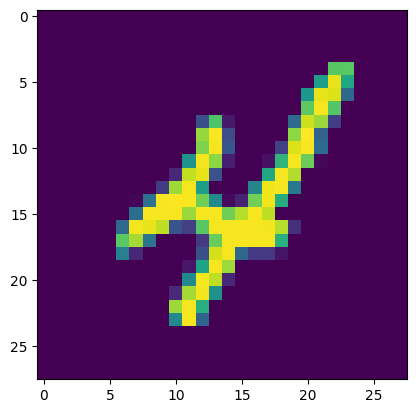

In [128]:
# X_train2[9] 값을 적절한 형태로 변환하여 
# 그래프로 출력(시각화)

# X_train2[9] : (784,) -> (28,28) 2차원으로 변경해야 시각화 가능
digit = X_train2[9].reshape(28, 28)

plt.imshow(digit) #cmap=plt.cm.binary, cmap='RdBu', 디폴트 : viridis
plt.show()